In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
np.random.seed(42)
x = np.random.rand(100,1) - 0.5
y = 3*x[:,0]**2 + 0.05*np.random.randn(100)
x.shape

(100, 1)

In [51]:
df = pd.DataFrame()
df['x'] = x.reshape(100)
df['y'] = y
df.head()

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


In [52]:
df['x'].shape

(100,)

In [53]:
df['y'].shape

(100,)

Text(0.5, 1.0, 'X vs Y')

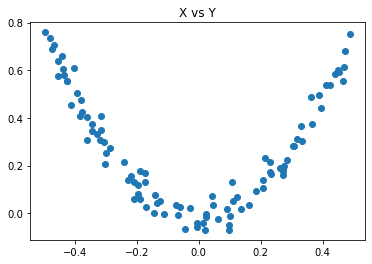

In [54]:
plt.scatter(df['x'],df['y'])
plt.title('X vs Y')

In [55]:
df['pred1'] = df['y'].mean()
df.head()

,x,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458


In [56]:
df['res1'] = df['y'] - df['pred1']
df.head()

,x,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


Text(0.5, 1.0, 'X vs Y')

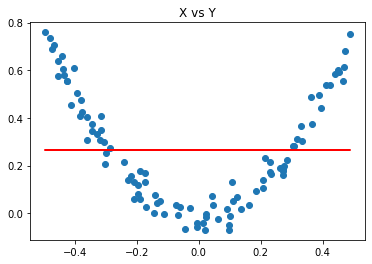

In [57]:
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],df['pred1'],color = 'red')
plt.title('X vs Y')

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
# Model2
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['x'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

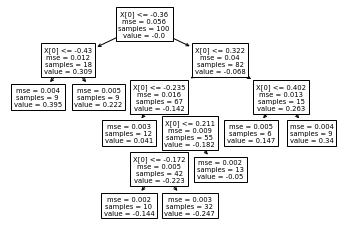

In [60]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [61]:
# generating x test
x_test = np.linspace(-0.5,0.5,100)
x_test

array([-0.5       , -0.48989899, -0.47979798, -0.46969697, -0.45959596,
       -0.44949495, -0.43939394, -0.42929293, -0.41919192, -0.40909091,
       -0.3989899 , -0.38888889, -0.37878788, -0.36868687, -0.35858586,
       -0.34848485, -0.33838384, -0.32828283, -0.31818182, -0.30808081,
       -0.2979798 , -0.28787879, -0.27777778, -0.26767677, -0.25757576,
       -0.24747475, -0.23737374, -0.22727273, -0.21717172, -0.20707071,
       -0.1969697 , -0.18686869, -0.17676768, -0.16666667, -0.15656566,
       -0.14646465, -0.13636364, -0.12626263, -0.11616162, -0.10606061,
       -0.0959596 , -0.08585859, -0.07575758, -0.06565657, -0.05555556,
       -0.04545455, -0.03535354, -0.02525253, -0.01515152, -0.00505051,
        0.00505051,  0.01515152,  0.02525253,  0.03535354,  0.04545455,
        0.05555556,  0.06565657,  0.07575758,  0.08585859,  0.0959596 ,
        0.10606061,  0.11616162,  0.12626263,  0.13636364,  0.14646465,
        0.15656566,  0.16666667,  0.17676768,  0.18686869,  0.19

In [62]:
# y_pred = (prediction from model1, i.e., MEAN of y) + (model2 prediction, i.e., tree1 which is model2 in this case )
y_pred = 0.265458 + tree1.predict(x_test.reshape(100,1))

Text(0.5, 1.0, 'X vs Y')

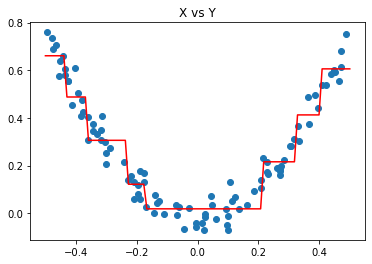

In [63]:
plt.scatter(df['x'],df['y'])
plt.plot(x_test,y_pred,color = 'red')
plt.title('X vs Y')

In [64]:
df['pred2'] = 0.265458 + tree1.predict(df['x'].values.reshape(100,1))

In [65]:
df.head()

,x,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964


In [66]:
df['res2'] = df['y'] - df['pred2']
df.head()

,x,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022


In [67]:
# Model3
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['x'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [68]:
y_pred = 0.265458 + tree1.predict(x_test.reshape(100,1)) + tree2.predict(x_test.reshape(100,1))
# y_pred = 0.265458 + regressor.predict(x_test.reshape(100,1)) for regressor in (tree1,tree2)

Text(0.5, 1.0, 'X vs Y')

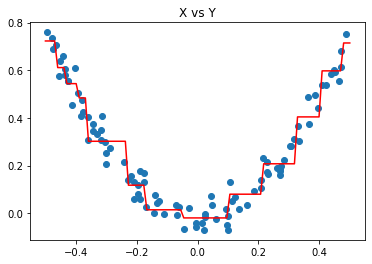

In [70]:
plt.scatter(df['x'],df['y'])
plt.plot(x_test,y_pred,color = 'red')
plt.title('X vs Y')